##*Análisis Exploratorio* *(EDA)*

1- Cargar el Conjunto de Datos: Importar el conjunto de datos en el entorno de trabajo.

2-Explorar la Estructura del Conjunto de Datos: Examinar las primeras filas, obtener información sobre tipos de datos, dimensiones y verificar la presencia de datos nulos.

3-Estadísticas Descriptivas: Calcular estadísticas descriptivas básicas, como promedios, medianas y desviaciones estándar, para entender la distribución de los datos.

4-Visualizaciones: Crear visualizaciones simples, como histogramas, boxplots o gráficos de barras, para explorar la distribución de las variables.

###Importamos Librerias

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq
import warnings
warnings.filterwarnings('ignore')

EDA del archivo "output_steam_games.parquet"

In [28]:
df_steam = pd.read_parquet("steam_games.parquet")
df_steam.head(2)

,app_name,price,item_id,developer,release_year,genres
0,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018,Action
1,Ironbound,0.00,643980,Secret Level SRL,2018,Free to Play


In [29]:
df_steam.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   app_name      28899 non-null  object 
 1   price         28899 non-null  float64
 2   item_id       28899 non-null  int64  
 3   developer     28899 non-null  object 
 4   release_year  28899 non-null  int64  
 5   genres        28899 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.3+ MB


In [30]:
df_steam.isnull().sum() # obtenemos la cantidad de valores nulos por columna

app_name        0
price           0
item_id         0
developer       0
release_year    0
genres          0
dtype: int64

Variables categóricas:
- `app_name`: Nombre de la aplicación o juego.
- `item_id`: Identificador único del juego.
- `developer`: Desarrollador del juego.
- `release_year`: Año de lanzamiento del juego.
- `genres`: Género del juego.

###Feature genres

In [31]:
cantidad_generos= df_steam["genres"].value_counts() # obtenemos la cantidad de juegos por género
cantidad_generos.to_frame

<bound method Series.to_frame of genres
Action                       11273
Casual                        4340
Adventure                     4322
Indie                         3301
Simulation                    1844
Strategy                      1126
RPG                            682
Free to Play                   516
Racing                         454
Design &amp; Illustration      327
Animation &amp; Modeling       179
Pending classification         136
Utilities                       93
Audio Production                79
Sports                          63
Massively Multiplayer           49
Education                       46
Video Production                21
Software Training               21
Web Publishing                   8
Photo Editing                    8
Accounting                       7
Early Access                     4
Name: count, dtype: int64>

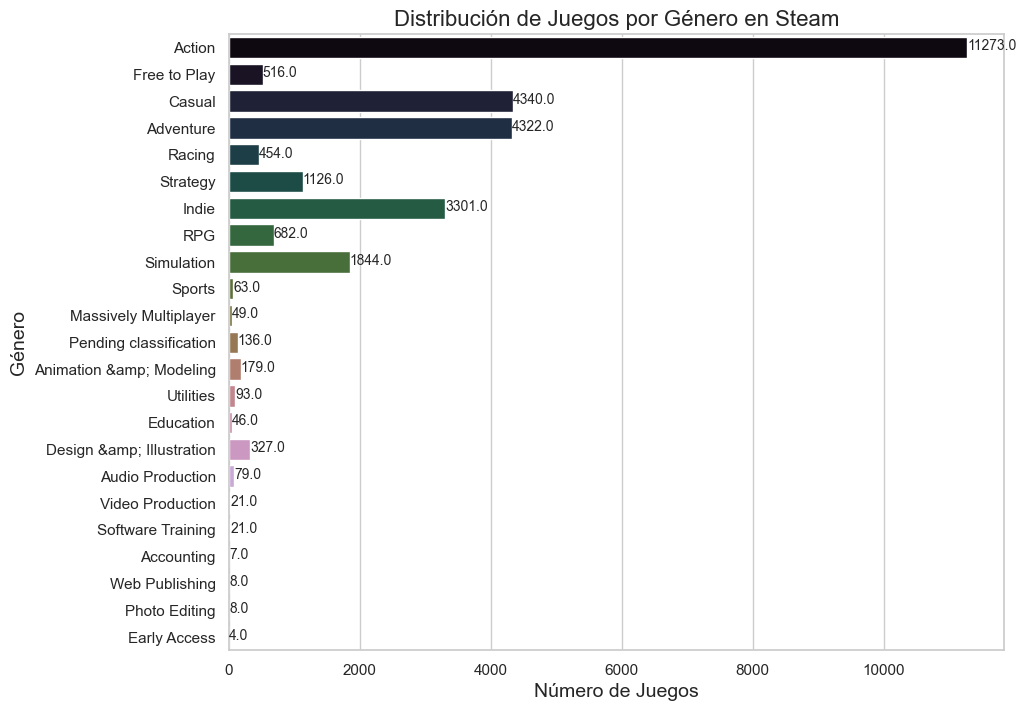

In [32]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df_steam, y='genres', orient='h', palette='cubehelix')

ax.set_title('Distribución de Juegos por Género en Steam', fontsize=16)
ax.set_xlabel('Número de Juegos', fontsize=14)
ax.set_ylabel('Género', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 0.1, p.get_y() + 0.5), fontsize=10)

plt.show()

Los generos que mayor cantidad de veces se repiten son Indie,Action, Casual y Adventure

###Feature item_id

In [33]:
cantidad_juegos = len(df_steam["item_id"].unique()) # obtenemos la cantidad de software único presente en Steam
cantidad_juegos

28899

La plataforma de juegos Steam contiene un total de 28,850 item_id, que representan la cantidad de títulos o juegos disponibles en la plataforma.

###Feature release_year

In [34]:
lanzamiento_por_anio = df_steam["release_year"].value_counts() # obtenemos la cantidad de juegos por año de lanzamiento
lanzamiento_por_anio

release_year
2017    9201
2016    6712
2015    5084
2014    2739
2013    1459
2012    1159
2011     553
2010     403
2009     320
2008     196
2007     150
2006     143
2018      92
2005      92
2003      74
2004      64
2001      59
1998      50
1999      48
2002      42
1997      39
1996      36
2000      36
1994      32
1995      31
1993      25
1992      13
1991      12
1990      10
1989       7
1988       5
1987       4
2019       3
1984       2
1983       1
1986       1
2021       1
1985       1
Name: count, dtype: int64

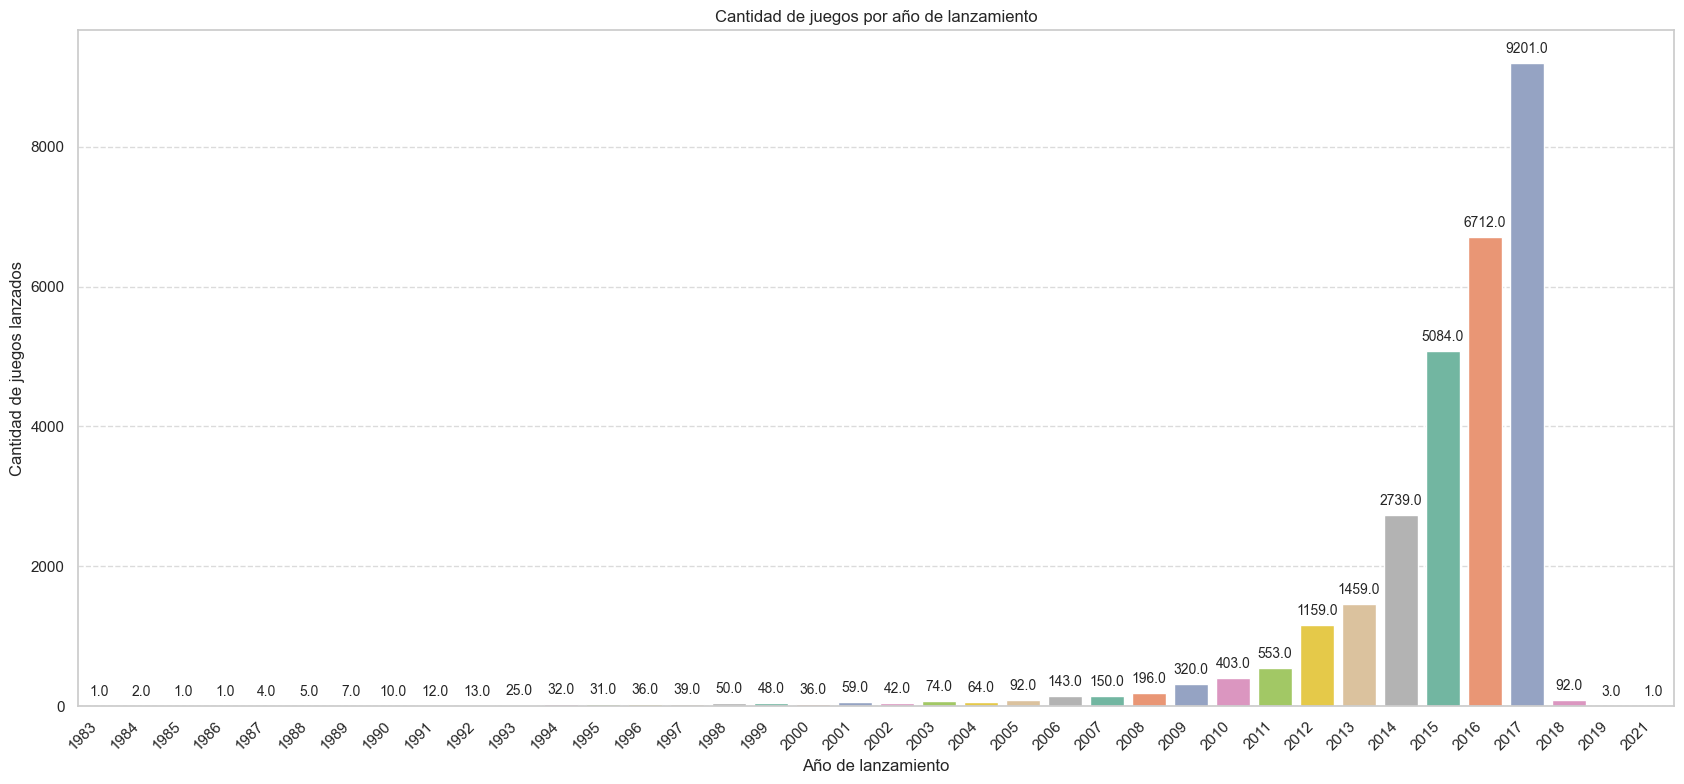

In [35]:
lanzamiento_por_anio = lanzamiento_por_anio.sort_index()

sns.set(style="whitegrid")

plt.figure(figsize=(17, 8))

ax = sns.barplot(x=lanzamiento_por_anio.index, y=lanzamiento_por_anio.values, palette="Set2")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set(xlabel='Año de lanzamiento', ylabel='Cantidad de juegos lanzados',
       title='Cantidad de juegos por año de lanzamiento')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Entre los años 2007 y 2017, se observa un crecimiento exponencial en la cantidad de juegos lanzados anualmente en la plataforma Steam, alcanzando su punto máximo en 2017 con 9201 títulos lanzados.

###Feature developer

In [36]:
developer = df_steam["developer"].value_counts() # obtenemos la cantidad de juegos por desarrollador
developer

developer
Ubisoft - San Francisco                     1259
SmiteWorks USA, LLC                          813
Dovetail Games                               253
KOEI TECMO GAMES CO., LTD.                   232
Paradox Development Studio                   156
                                            ... 
Salus Games                                    1
Class of  2016-2017                            1
Pirotexnik                                     1
ElVery333,Raquel Covelo Suarez,ATopeCode       1
Bidoniera Games                                1
Name: count, Length: 11011, dtype: int64

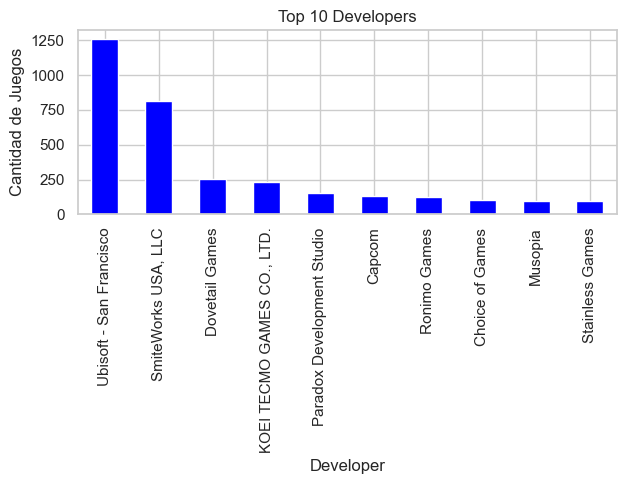

In [37]:
# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
developer[:10].plot(kind='bar', color='blue')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

Los principales desarrolladores de juegos en la plataforma Steam son Ubisoft y SmiteWorks.

EDA del archivo "australian_user_reviews.parquet"

In [39]:
df_reviews = pd.read_parquet("australian_user_reviews.parquet")
df_reviews.head(2)

,user_id,item_id,recommend,posted_year,sentiment_analysis
0,76561197970982479,1250,True,2011,2
1,76561197970982479,22200,True,2011,1


In [40]:
df_reviews.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59161 entries, 0 to 59160
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             59161 non-null  object
 1   item_id             59161 non-null  int64 
 2   recommend           59161 non-null  bool  
 3   posted_year         59161 non-null  int64 
 4   sentiment_analysis  59161 non-null  int64 
dtypes: bool(1), int64(3), object(1)
memory usage: 1.9+ MB


In [41]:
df_reviews.isnull().sum() # obtenemos la cantidad de valores nulos por columna

user_id               0
item_id               0
recommend             0
posted_year           0
sentiment_analysis    0
dtype: int64

Variables categóricas:
- `user_id`: Identificación del usuario de la plataforma.
- `recommend`: Valor booleano que indica si se ha realizado una revisión.
- `sentiment_analysis`: Clasificación de las revisiones en:
  - Positivo: 2
  - Negativo: 0
  - Neutral: 1

###Feature user_id

In [42]:
# contabilizamos la cantidad de usuarios de juegos Steam que hay en la plataforma 
cantidad_users= len(df_reviews["user_id"].unique())
cantidad_users

25467

Contamos con 25467 usuarios

##Feature recommend


In [43]:
cant_recomend= df_reviews["recommend"].value_counts() #contamos la cantidad de recomendaciones hechas
cant_recomend

recommend
True     52350
False     6811
Name: count, dtype: int64

###Feature sentiment_analisis

In [44]:
# realizamos el conteo de cada una de las categorias de sentimientos
cant_sent= df_reviews["sentiment_analysis"].value_counts()
cant_sent

sentiment_analysis
2    32181
1    22000
0     4980
Name: count, dtype: int64

 Tratamiento Variables numéricas
posted_year : fecha en que se realiza la review

###Feature posted_year

In [45]:
fecha=df_reviews["posted_year"].describe()
fecha

count    59161.000000
mean      2013.933571
std          1.098180
min       2010.000000
25%       2013.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: posted_year, dtype: float64

Histograma

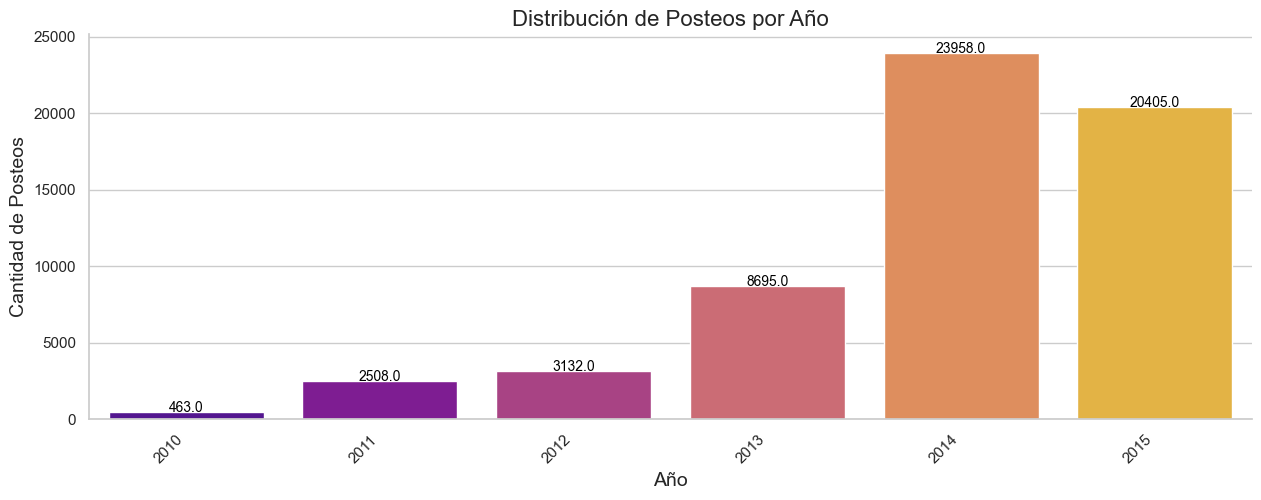

In [46]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(15, 5))

ax = sns.countplot(data=df_reviews, x=df_reviews["posted_year"], palette="plasma")  # Agrega una coma aquí

ax.set_title('Distribución de Posteos por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Posteos', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

sns.despine()
plt.show()

La cantidad de posteos es de 23958

###*EDA de user_items.parquet*

In [47]:
df_items = pd.read_parquet("australian_users_items.parquet")
df_items.head(2)

,item_id,item_name,steam_id,items_count,user_id,playtime_hours
0,10,Counter-Strike,76561197970982479,277,76561197970982479,0.10
1,30,Day of Defeat,76561197970982479,277,76561197970982479,0.12


In [48]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246375 entries, 0 to 3246374
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   item_id         int64  
 1   item_name       object 
 2   steam_id        int64  
 3   items_count     int64  
 4   user_id         object 
 5   playtime_hours  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 148.6+ MB


In [49]:
df_items.isnull().sum()

item_id           0
item_name         0
steam_id          0
items_count       0
user_id           0
playtime_hours    0
dtype: int64

Variables categóricas
item_name : titulo del juego Steam

##Feature item_name

In [50]:
cant_juegos = len(df_items["item_name"].unique()) # obtenemos la cantidad de software único presente en Steam
cant_juegos

10024

In [52]:
juego = df_items["item_name"].value_counts() # obtenemos la cantidad de juegos por nombre
juego

item_name
Counter-Strike: Global Offensive    42842
Garry's Mod                         41639
Left 4 Dead 2                       34535
Unturned                            34089
Terraria                            28244
                                    ...  
Castles                                 1
The Empty Inn                           1
Dr. Bulbaceous                          1
Cue Club 2                              1
Arachnophobia                           1
Name: count, Length: 10024, dtype: int64

Variables numéricas:
- `items_count`: Cantidad de juegos de Steam consumidos por un usuario.
- `playtime_forever`: Cantidad de tiempo que un usuario juega.

In [ ]:
###Feature items_count

In [53]:
items_count = df_items.groupby('user_id')['items_count'].unique().explode() # obtenemos la cantidad de juegos por usuario
items_count= pd.DataFrame(items_count) # convertimos a dataframe
items_count_user = items_count.sort_values('items_count', ascending=False) # ordenamos de mayor a menor
items_count_user

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198072737788,1
76561198069543256,1
76561198063914266,1


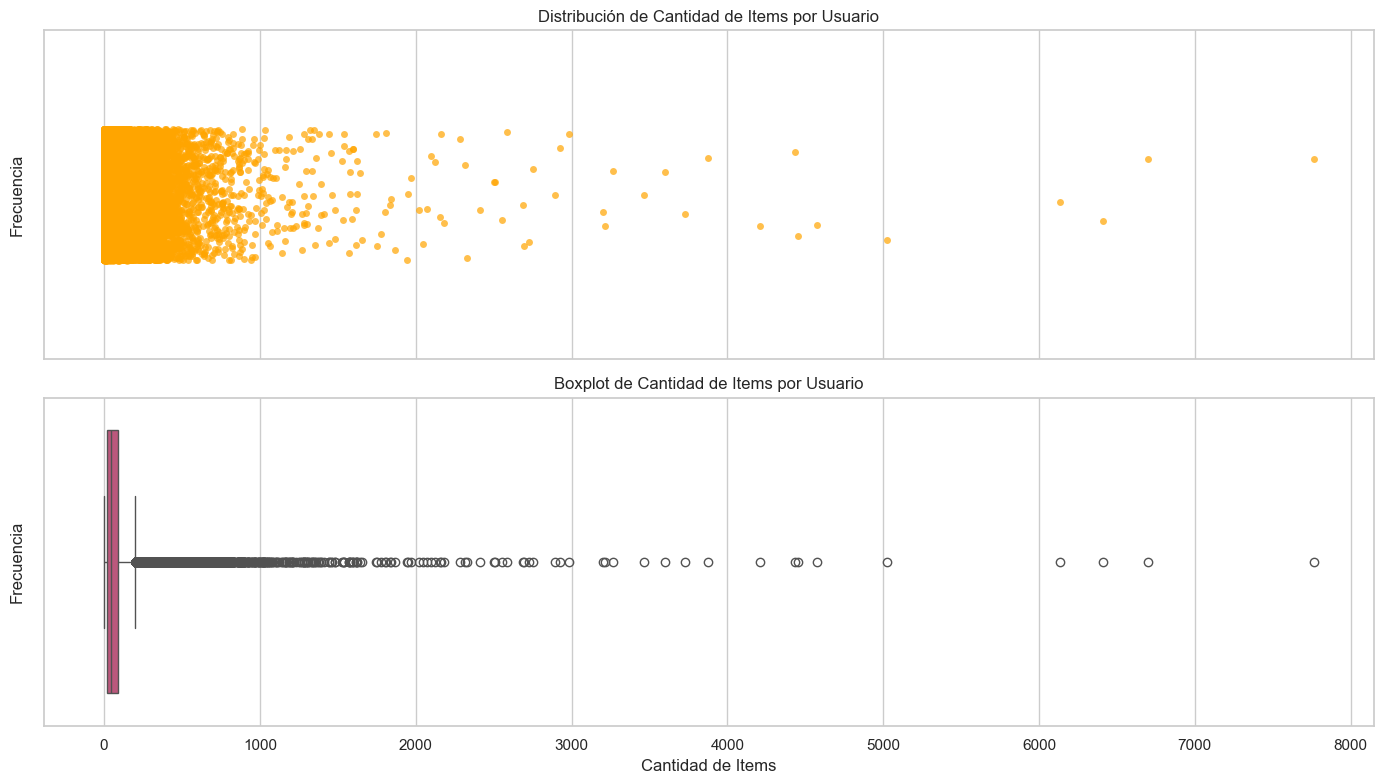

In [54]:
# Creamos un un Stripplot y un Boxplot para visualizar la distribución de la cantidad de items por usuario
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=items_count_user, x='items_count', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Items por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=items_count_user, x='items_count', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Items por Usuario')

plt.tight_layout()
plt.show()

In [55]:
items_count_user.describe()

,items_count
count,68403
unique,924
top,2
freq,1545


La cantidad total artículos consumidos es de 68403.

###Feature playtime_hours

In [56]:
time_count = df_items.groupby('user_id')['playtime_hours'].unique().explode()  # Obtenemos el tiempo de juego por usuario
time_count = pd.DataFrame(time_count)  # Convertimos a DataFrame
time_count['playtime_hours'] = time_count['playtime_hours']
time_count_user = time_count.sort_values('playtime_hours', ascending=False)  # Ordenamos de mayor a menor
time_count_user

,playtime_hours
user_id,
wolop,10712.88
Evilutional,10588.25
76561198019826668,10540.87
76561198039832932,10223.52
tsunamitad,10001.13
...,...
76561198078062945,0.02
76561198101995099,0.02
76561198066935199,0.02


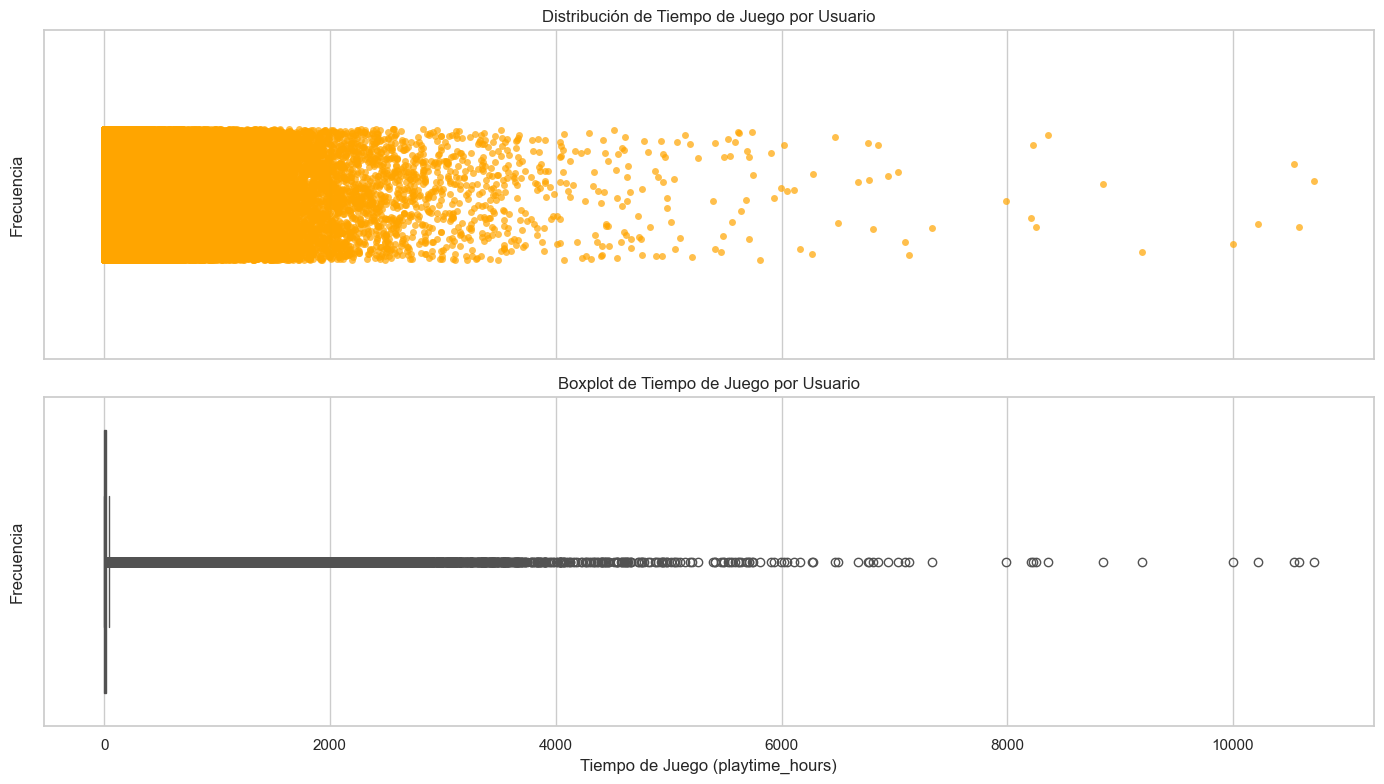

In [57]:
# Confeccionamos un Stripplot y un Boxplot para visualizar la distribución del tiempo de juego por usuario
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=time_count_user, x='playtime_hours', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Tiempo de Juego (playtime_hours)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Tiempo de Juego por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=time_count_user, x='playtime_hours', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Tiempo de Juego (playtime_hours)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Tiempo de Juego por Usuario')

plt.tight_layout()
plt.show()

###*Dataset para el Modelo de Recomendación*

In [58]:
modelo_item = pd.read_parquet("steam_games.parquet")
modelo_item

,app_name,price,item_id,developer,release_year,genres
0,Lost Summoner Kitty,4.99,761140,Kotoshiro,2018,Action
1,Ironbound,0.00,643980,Secret Level SRL,2018,Free to Play
2,Real Pool 3D - Poolians,0.00,670290,Poolians.com,2017,Casual
3,弹炸人2222,0.99,767400,彼岸领域,2017,Action
4,Battle Royale Trainer,3.99,772540,Trickjump Games Ltd,2018,Action
...,...,...,...,...,...,...
28894,Kebab it Up!,1.99,745400,Bidoniera Games,2018,Action
28895,Colony On Mars,1.99,773640,"Nikita ""Ghost_RUS""",2018,Casual
28896,LOGistICAL: South Africa,4.99,733530,Sacada,2018,Casual
28897,Russian Roads,1.99,610660,Laush Dmitriy Sergeevich,2018,Indie


Creamos un dataframe con las columnas que utilizaremos: item_id, app_name y genre

In [59]:
modelo_item = modelo_item[["item_id", "app_name", "genres"]]
modelo_item

,item_id,app_name,genres
0,761140,Lost Summoner Kitty,Action
1,643980,Ironbound,Free to Play
2,670290,Real Pool 3D - Poolians,Casual
3,767400,弹炸人2222,Action
4,772540,Battle Royale Trainer,Action
...,...,...,...
28894,745400,Kebab it Up!,Action
28895,773640,Colony On Mars,Casual
28896,733530,LOGistICAL: South Africa,Casual
28897,610660,Russian Roads,Indie


In [60]:
modelo_item.info() # obtenemos información de las columnas y sus tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28899 entries, 0 to 28898
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item_id   28899 non-null  int64 
 1   app_name  28899 non-null  object
 2   genres    28899 non-null  object
dtypes: int64(1), object(2)
memory usage: 677.4+ KB


###Creamos el archivo

In [61]:
modelo_item = modelo_item.copy() # Creamos una copia del dataframe

In [62]:
modelo_item.to_csv("modelo_item.csv", index=False, encoding='utf-8') # Exportamos el dataframe a csv

In [63]:
modelo_item = pd.read_csv("modelo_item.csv") # leemos el archivo csv

tabla = pa.Table.from_pandas(modelo_item) # convertimos el dataframe en una tabla de pyarrow
pq.write_table(tabla,"modelo_item.parquet") # exportamos la tabla a parquet